<a href="https://colab.research.google.com/github/DharuniM/MLlabactivity/blob/main/LogRegEx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) A researcher is interested in how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution, affect admission into graduate school. The response variable, admit/don’t admit, is a binary variable.

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://stats.idre.ucla.edu/stat/stata/dae/binary.dta"
data = pd.read_stata(url)
data.head()

,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float32
 1   gre     400 non-null    float32
 2   gpa     400 non-null    float32
 3   rank    400 non-null    float32
dtypes: float32(4)
memory usage: 6.4 KB
None
            admit         gre         gpa        rank
count  400.000000  400.000000  400.000000  400.000000
mean     0.317500  587.700012    3.389900    2.485000
std      0.466087  115.516663    0.380567    0.944462
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.395000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000


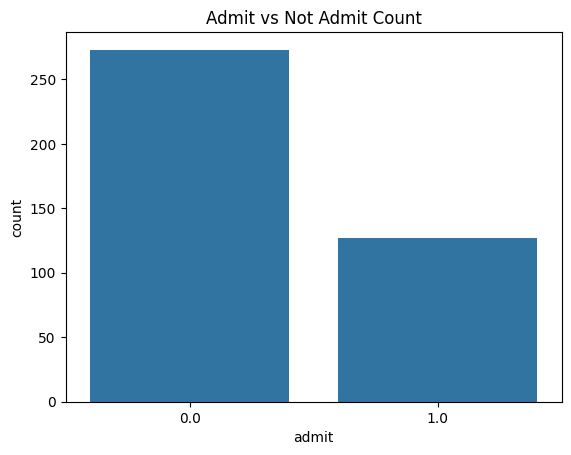

In [3]:
print(data.info())
print(data.describe())

sns.countplot(x='admit', data=data)
plt.title("Admit vs Not Admit Count")
plt.show()

In [4]:
rank_dummies = pd.get_dummies(data['rank'], prefix='rank', drop_first=True)
X = pd.concat([data[['gre', 'gpa']], rank_dummies], axis=1)
y = data['admit']


In [5]:
print(X.dtypes)

gre         float32
gpa         float32
rank_2.0       bool
rank_3.0       bool
rank_4.0       bool
dtype: object


In [6]:
X.columns = X.columns.str.strip()

In [7]:
print(X.dtypes)
print(y.dtypes)

gre         float32
gpa         float32
rank_2.0       bool
rank_3.0       bool
rank_4.0       bool
dtype: object
float32


In [8]:
X.columns = X.columns.str.strip()
X = X.apply(pd.to_numeric, errors='raise')
y = pd.to_numeric(y, errors='raise')

In [9]:
X = X.astype(float)

In [10]:
X[['rank_2.0', 'rank_3.0', 'rank_4.0']] = X[['rank_2.0', 'rank_3.0', 'rank_4.0']].astype(int)

In [11]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.589306
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Tue, 22 Jul 2025   Pseudo R-squ.:                 0.05707
Time:                        17:11:55   Log-Likelihood:                -235.72
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 9.732e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0014      0.001      1.329      0.184      -0.001       0.003
gpa           -0.1336      0.

In [12]:
pred_probs = result.predict(X)
y_pred = (pred_probs >= 0.5).astype(int)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

Accuracy: 0.695

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.90      0.80       273
         1.0       0.54      0.26      0.35       127

    accuracy                           0.69       400
   macro avg       0.63      0.58      0.58       400
weighted avg       0.67      0.69      0.66       400

